In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
from pathlib import Path

import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

import sys
sys.path.insert(0, '/lustre/groups/ml01/code/karin.hrovatin/diabetes_analysis/')
import helper as h
import importlib
importlib.reload(h)
import helper as h

In [2]:
path_data='/lustre/groups/ml01/workspace/karin.hrovatin/data/pancreas/scRNA/combined/'

In [3]:
# Saving figures
path_fig='/lustre/groups/ml01/workspace/karin.hrovatin/data/pancreas/figures/paper/'
sc._settings.ScanpyConfig.figdir=Path(path_fig)

In [4]:
adata_rn_b=sc.read(path_data+'data_rawnorm_integrated_analysed_beta_v1s1_sfintegrated.h5ad')
adata_rn_b.shape

(102143, 30672)

Make filter for removing low quality coarse clusters. Below are ploted UMAPs containing all cells or removing low quality clusters.

In [5]:
# Subset cells - no low Q
nolowq_sub=~adata_rn_b.obs['leiden_r1.5_parsed_const'].str.contains('low_quality')

#### Study

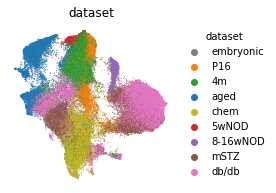

In [5]:
fig,ax=plt.subplots(figsize=(3,3))
np.random.seed(0)
random_indices=np.random.permutation(list(range(adata_rn_b.shape[0])))
sc.pl.embedding(adata_rn_b[random_indices,:],'X_umap_opt',color='study_parsed',s=3,
          frameon=False,title='dataset',ax=ax,show=False)
#fig.tight_layout() # Set to False so that stuff is properly drawn
ax.legend_.set_title('dataset')
plt.savefig(path_fig+'umap_beta_covariate_study_eopt.png',dpi=300,bbox_inches='tight')

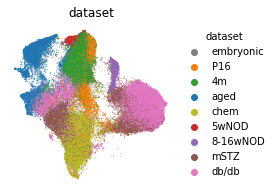

In [9]:
fig,ax=plt.subplots(figsize=(3,3))
np.random.seed(0)
random_indices=np.random.permutation(list(range(adata_rn_b[nolowq_sub,:].shape[0])))
sc.pl.embedding(adata_rn_b[nolowq_sub,:][random_indices,:],'X_umap_opt',color='study_parsed',s=3,
          frameon=False,title='dataset',ax=ax,show=False)
#fig.tight_layout() # Set to False so that stuff is properly drawn
ax.legend_.set_title('dataset')
plt.savefig(path_fig+'umap_beta_covariate_study_nolowQ_eopt.png',dpi=300,bbox_inches='tight')

#### Age
Age in healthy postnatal. map ages to categories as else the color scheme is hard to look at (hard to distinguish younger ages due to presenc eof 2y sample).

In [ ]:
# Age mapped to age category
healthy_samples_age={
 'Fltp_2y_MUC13976_mGFP':'old',
 'Fltp_2y_MUC13975_mTmG':'old',
 'Fltp_2y_MUC13974_mRFP':'old',
 'Fltp_adult_mouse1_head_Fltp-':'adult',
 'Fltp_adult_mouse2_head_Fltp+':'adult',
 'Fltp_adult_mouse4_tail_Fltp+':'adult',
 'Fltp_adult_mouse3_tail_Fltp-':'adult',
 'Fltp_P16_145_mGFP_mGFP':'pup',
 'Fltp_P16_146_mRFP_mRFP':'pup',
 'Fltp_P16_147_mTmG_mTmG':'pup',
 'NOD_SRR10985098_IRE1alphabeta-/-':'adolescent',
 'NOD_SRR10985099_IRE1alphafl/fl':'adolescent',
 'NOD_SRR10985097_IRE1alphabeta-/-':'adolescent',
 'NOD_elimination_SRR7610297_8w':'young adult',
 'NOD_elimination_SRR7610295_8w':'young adult',
 'NOD_elimination_SRR7610296_8w':'young adult',
 'spikein_drug_SRR10751509_DMSO_r2':'young adult',
 'spikein_drug_SRR10751504_DMSO_r1':'young adult',
 'spikein_drug_SRR10751514_DMSO_r3':'young adult',
 'VSG_MUC13633_chow_WT':'adult',
 'VSG_MUC13634_chow_WT':'adult',
 'STZ_G1_control':'adult'}
# Order ages and map to colors
ages_order=['pup','adolescent','young adult','adult','old']
normalize = mcolors.Normalize(vmin=0,  vmax=len(ages_order)-1)
age_colors={age:cm.viridis(normalize(idx)) for idx,age in enumerate(ages_order)}
adata_rn_b.obs['age_group']=pd.Categorical(
    adata_rn_b.obs.study_sample_design.map(healthy_samples_age),
    categories=ages_order,ordered=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

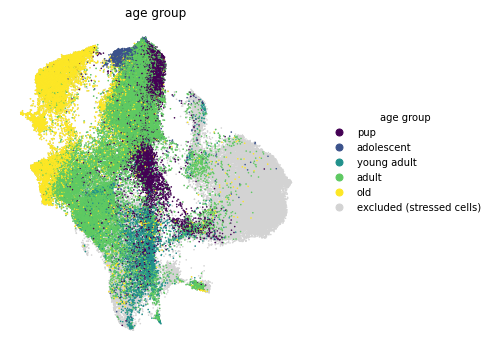

In [10]:
# Plot all cells

fig,ax=plt.subplots(figsize=(7,5))
sc.pl.embedding(adata_rn_b,'X_umap_opt',ax=ax,show=False,s=10,frameon=False)
# Select healthy and randomize order
random_indices_healthy=np.random.permutation(
    np.argwhere(adata_rn_b.obs.study_sample_design.isin(healthy_samples_age).values).ravel())
# Make temp adata to remove NA category and use original uns
adata_temp=adata_rn_b[random_indices_healthy,:].copy()
adata_temp.uns['age_group_colors']=list(age_colors.values())
sc.pl.embedding(adata_temp,'X_umap_opt',ax=ax,show=False,s=10,
          color='age_group',frameon=False,title='age group')
ax.legend_.remove()
l1=ax.legend(handles=[
    Line2D([0], [0], marker='o', color=c,lw=0, label=l,
    markerfacecolor=c, markersize=7) for l,c in zip(
        list(adata_temp.obs.age_group.cat.categories)+['excluded (stressed cells)'],
        adata_temp.uns['age_group_colors']+['lightgray']
    )], frameon=False)
             
l1.set_title("age group")  
l1.set_bbox_to_anchor((1.05,0.75))

fig.tight_layout()
plt.savefig(path_fig+'umap_beta_covariate_age_eopt.png',dpi=300,bbox_inches='tight')
del adata_temp

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

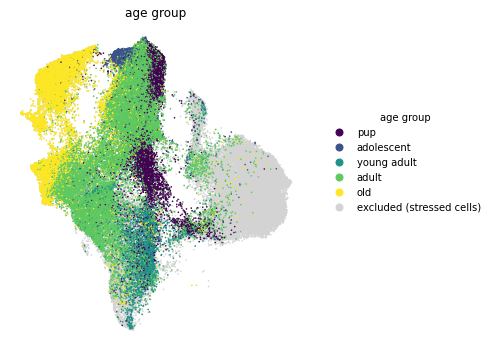

In [11]:
# Plot - exclude lowQ
fig,ax=plt.subplots(figsize=(7,5))
sc.pl.embedding(adata_rn_b[nolowq_sub,:],'X_umap_opt',ax=ax,show=False,s=10,frameon=False)
# Select healthy and randomize order
random_indices_healthy=np.random.permutation(
    np.argwhere(adata_rn_b[nolowq_sub,:].obs.study_sample_design.isin(healthy_samples_age).values).ravel())
# Make temp adata to remove NA category and use original uns
adata_temp=adata_rn_b[nolowq_sub,:][random_indices_healthy,:].copy()
adata_temp.uns['age_group_colors']=list(age_colors.values())
sc.pl.embedding(adata_temp,'X_umap_opt',ax=ax,show=False,s=10,
          color='age_group',frameon=False,title='age group')
ax.legend_.remove()
l1=ax.legend(handles=[
    Line2D([0], [0], marker='o', color=c,lw=0, label=l,
    markerfacecolor=c, markersize=7) for l,c in zip(
        list(adata_temp.obs.age_group.cat.categories)+['excluded (stressed cells)'],
        adata_temp.uns['age_group_colors']+['lightgray']
    )], frameon=False)
             
l1.set_title("age group")  
l1.set_bbox_to_anchor((1.05,0.75))

fig.tight_layout()
plt.savefig(path_fig+'umap_beta_covariate_age_nolowQ_eopt.png',dpi=300,bbox_inches='tight')

#### Diabetes
Diabetes categories - healthy or model type

In [6]:
# T1D and T2D (untreated) samples by diabetes model vs healthy controls from same studies
diseased_category={
 'NOD_elimination_SRR7610300_14w':'NOD',
 'NOD_elimination_SRR7610299_14w':'NOD',
 'NOD_elimination_SRR7610298_14w':'NOD',
 'NOD_elimination_SRR7610303_16w':'NOD',
 'NOD_elimination_SRR7610301_16w':'NOD',
 'NOD_elimination_SRR7610302_16w':'NOD',
 'NOD_elimination_SRR7610295_8w':'healthy control',
 'NOD_elimination_SRR7610296_8w':'healthy control',
 'NOD_elimination_SRR7610297_8w':'healthy control',
 'VSG_MUC13633_chow_WT':'healthy control',
 'VSG_MUC13634_chow_WT':'healthy control',
 'VSG_MUC13641_sham_Lepr-/-':'db/db',
 'VSG_MUC13639_sham_Lepr-/-':'db/db',
 'STZ_G2_STZ':'mSTZ',
 'STZ_G1_control':'healthy control'}
diseased_order_colors={'healthy control':'#8BBD0C',
                       'NOD':'#7B05AB','mSTZ':'#FFCC57','db/db':'#C72323'}

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.uns` of view, copying.


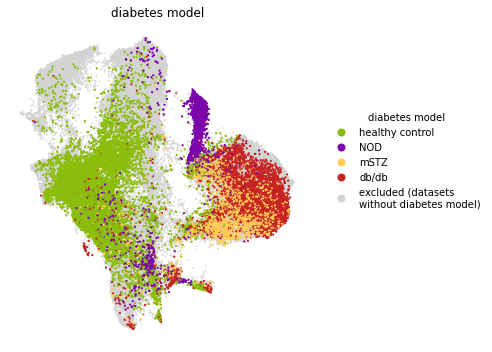

In [10]:
fig,ax=plt.subplots(figsize=(7,5))
sc.pl.embedding(adata_rn_b,'X_umap_opt',ax=ax,show=False,s=10,frameon=False)
# Add colors
adata_temp=adata_rn_b[np.argwhere(adata_rn_b.obs.study_sample_design.isin(
    diseased_category.keys()).values).ravel(),:]
adata_temp.obs['diseased_group']=pd.Categorical(
    adata_temp.obs.study_sample_design.map(diseased_category),
    categories=diseased_order_colors.keys(),ordered=True)
# Select colored and randomize order
# Random cell ordering so that cells on top are not biased by group size
# Cells on top have one per group as long as groups have cells
# and then append the rest of the group at the end
groups=adata_temp.obs.reset_index().groupby('diseased_group',dropna=True)
n_group_max=groups.size().max()
n_groups=len(groups)
cells=np.empty((n_group_max*n_groups))
cells[:]=np.nan
for idx,(group,data) in enumerate(groups.groups.items()):
    # Put n-th group's cells to n-th positions, intertwining the groups
    idx=np.array(range(data.shape[0]))*n_groups+idx
    # random ordering within group
    np.random.seed(0)
    idx=np.random.permutation(idx)
    cells[idx]=data   
# Remove empty cell positions, convert to int for indexing, 
# reverse order to plot mixed part on top
cells=cells[~np.isnan(cells)].astype(int)[::-1]
# Make temp adata to remove NA category and use original uns
adata_temp=adata_temp[cells,:]
adata_temp.uns['diseased_group_colors']=list(diseased_order_colors.values())
sc.pl.embedding(adata_temp,'X_umap_opt',ax=ax,show=False,s=20,
          color='diseased_group',frameon=False,title='diabetes model')

ax.legend_.remove()
l1=ax.legend(handles=[
    Line2D([0], [0], marker='o', color=c,lw=0, label=l,
    markerfacecolor=c, markersize=7) for l,c in zip(
        list(adata_temp.obs.diseased_group.cat.categories
            )+['excluded (datasets\nwithout diabetes model)'],
        adata_temp.uns['diseased_group_colors']+['lightgray']
    )], frameon=False)
             
l1.set_title("diabetes model") 
l1.set_bbox_to_anchor((1.05,0.75))

fig.tight_layout()
plt.savefig(path_fig+'umap_beta_covariate_diabetesModel_eopt.png',dpi=300,bbox_inches='tight')

del adata_temp

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.uns` of view, copying.


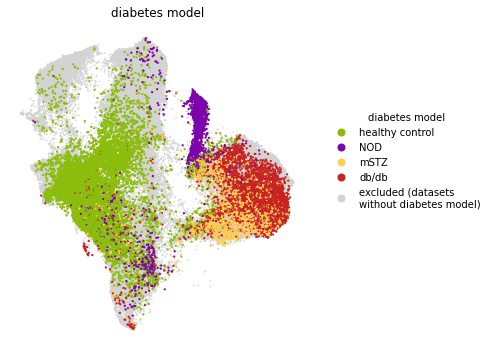

In [7]:
fig,ax=plt.subplots(figsize=(7,5))
sc.pl.embedding(adata_rn_b[nolowq_sub,:],'X_umap_opt',ax=ax,show=False,s=10,frameon=False)
# Add colors
adata_temp=adata_rn_b[nolowq_sub,:][np.argwhere(adata_rn_b[nolowq_sub,:].obs.study_sample_design.isin(
    diseased_category.keys()).values).ravel(),:]
adata_temp.obs['diseased_group']=pd.Categorical(
    adata_temp.obs.study_sample_design.map(diseased_category),
    categories=diseased_order_colors.keys(),ordered=True)
# Select colored and randomize order
# Random cell ordering so that cells on top are not biased by group size
# Cells on top have one per group as long as groups have cells
# and then append the rest of the group at the end
groups=adata_temp.obs.reset_index().groupby('diseased_group',dropna=True)
n_group_max=groups.size().max()
n_groups=len(groups)
cells=np.empty((n_group_max*n_groups))
cells[:]=np.nan
for idx,(group,data) in enumerate(groups.groups.items()):
    # Put n-th group's cells to n-th positions, intertwining the groups
    idx=np.array(range(data.shape[0]))*n_groups+idx
    # random ordering within group
    np.random.seed(0)
    idx=np.random.permutation(idx)
    cells[idx]=data   
# Remove empty cell positions, convert to int for indexing, 
# reverse order to plot mixed part on top
cells=cells[~np.isnan(cells)].astype(int)[::-1]
# Make temp adata to remove NA category and use original uns
adata_temp=adata_temp[cells,:]
adata_temp.uns['diseased_group_colors']=list(diseased_order_colors.values())
sc.pl.embedding(adata_temp,'X_umap_opt',ax=ax,show=False,s=20,
          color='diseased_group',frameon=False,title='diabetes model')

ax.legend_.remove()
l1=ax.legend(handles=[
    Line2D([0], [0], marker='o', color=c,lw=0, label=l,
    markerfacecolor=c, markersize=7) for l,c in zip(
        list(adata_temp.obs.diseased_group.cat.categories
            )+['excluded (datasets\nwithout diabetes model)'],
        adata_temp.uns['diseased_group_colors']+['lightgray']
    )], frameon=False)
             
l1.set_title("diabetes model") 
l1.set_bbox_to_anchor((1.05,0.75))

fig.tight_layout()
plt.savefig(path_fig+'umap_beta_covariate_diabetesModel_nolowQ_eopt.png',dpi=300,bbox_inches='tight')

del adata_temp

Mark study location on the emebdding besides diabetes categories

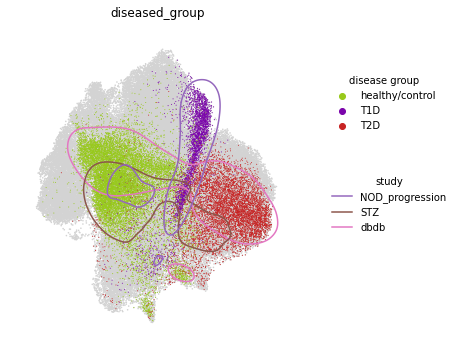

In [17]:
# T1D and T2D (untreated) samples vs healthy controls from same studies
diseased_category={
 'NOD_elimination_SRR7610300_14w':'T1D',
 'NOD_elimination_SRR7610299_14w':'T1D',
 'NOD_elimination_SRR7610298_14w':'T1D',
 'NOD_elimination_SRR7610303_16w':'T1D',
 'NOD_elimination_SRR7610301_16w':'T1D',
 'NOD_elimination_SRR7610302_16w':'T1D',
 'NOD_elimination_SRR7610295_8w':'healthy/control',
 'NOD_elimination_SRR7610296_8w':'healthy/control',
 'NOD_elimination_SRR7610297_8w':'healthy/control',
 'VSG_MUC13633_chow_WT':'healthy/control',
 'VSG_MUC13634_chow_WT':'healthy/control',
 'VSG_MUC13641_sham_Lepr-/-':'T2D',
 'VSG_MUC13639_sham_Lepr-/-':'T2D',
 'STZ_G2_STZ':'T2D',
 'STZ_G1_control':'healthy/control'}
diseased_order_colors={'healthy/control':'#98C91B','T1D':'#7B05AB','T2D':'#C72323'}
fig,ax=plt.subplots(figsize=(6.5,5))

# UMAP
sc.pl.umap(adata_rn_b,ax=ax,show=False,s=10)
# Select healthy and randomize order
random_indices_healthy=np.random.permutation(
    np.argwhere(adata_rn_b.obs.study_sample_design.isin(diseased_category.keys()).values).ravel())
# Make temp adata to remove NA category and use original uns
adata_temp=adata_rn_b[random_indices_healthy,:].copy()
adata_temp.obs['diseased_group']=pd.Categorical(
    adata_temp.obs.study_sample_design.map(diseased_category),
    categories=diseased_order_colors.keys(),ordered=True)
adata_temp.uns['diseased_group_colors']=list(diseased_order_colors.values())
sc.pl.umap(adata_temp,ax=ax,show=False,s=4,
          color='diseased_group',frameon=False)
l1=ax.legend_
l1.set_title("disease group") 
l1.set_bbox_to_anchor((1.05,0.75))

# KDE 
# KDE data
# TODO could make KDE separately for healthy and diseased
data=pd.DataFrame({'UMAP1':adata_temp.obsm['X_umap'][:,0],
                   'UMAP2':adata_temp.obsm['X_umap'][:,1]})
data['study']=adata_temp.obs['study_parsed'].values
# Plot per study to normalise per study
for study in data.study.unique():
    sb.kdeplot(data=data.query('study==@study'), x="UMAP1", y="UMAP2", hue="study",ax=ax,
          palette=sc.plotting._tools.scatterplots._get_palette(adata_rn_b, 'study_parsed'),
          levels=[0.25],alpha=1) # Line at such that 75% (1-levels) of data is contained
l2=ax.legend(ax.legend_.legendHandles, 
          [t.get_text() for t in ax.legend_.get_texts()], 
          bbox_to_anchor=(1.05,0.55), 
          title=ax.legend_.get_title().get_text(),
          frameon=False)

# Add first legend back
plt.gca().add_artist(l1)

fig.tight_layout()
plt.savefig(path_fig+'umap_beta_covariate_diabetes_study.png',dpi=300,bbox_inches='tight')

del adata_temp

#### Samples
Density colored UMAP for each sample

/home/icb/karin.hrovatin/miniconda3/envs/rpy2_3/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'design_sample_newline' as categorical
/home/icb/karin.hrovatin/miniconda3/envs/rpy2_3/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'design_sample_newline' as categorical


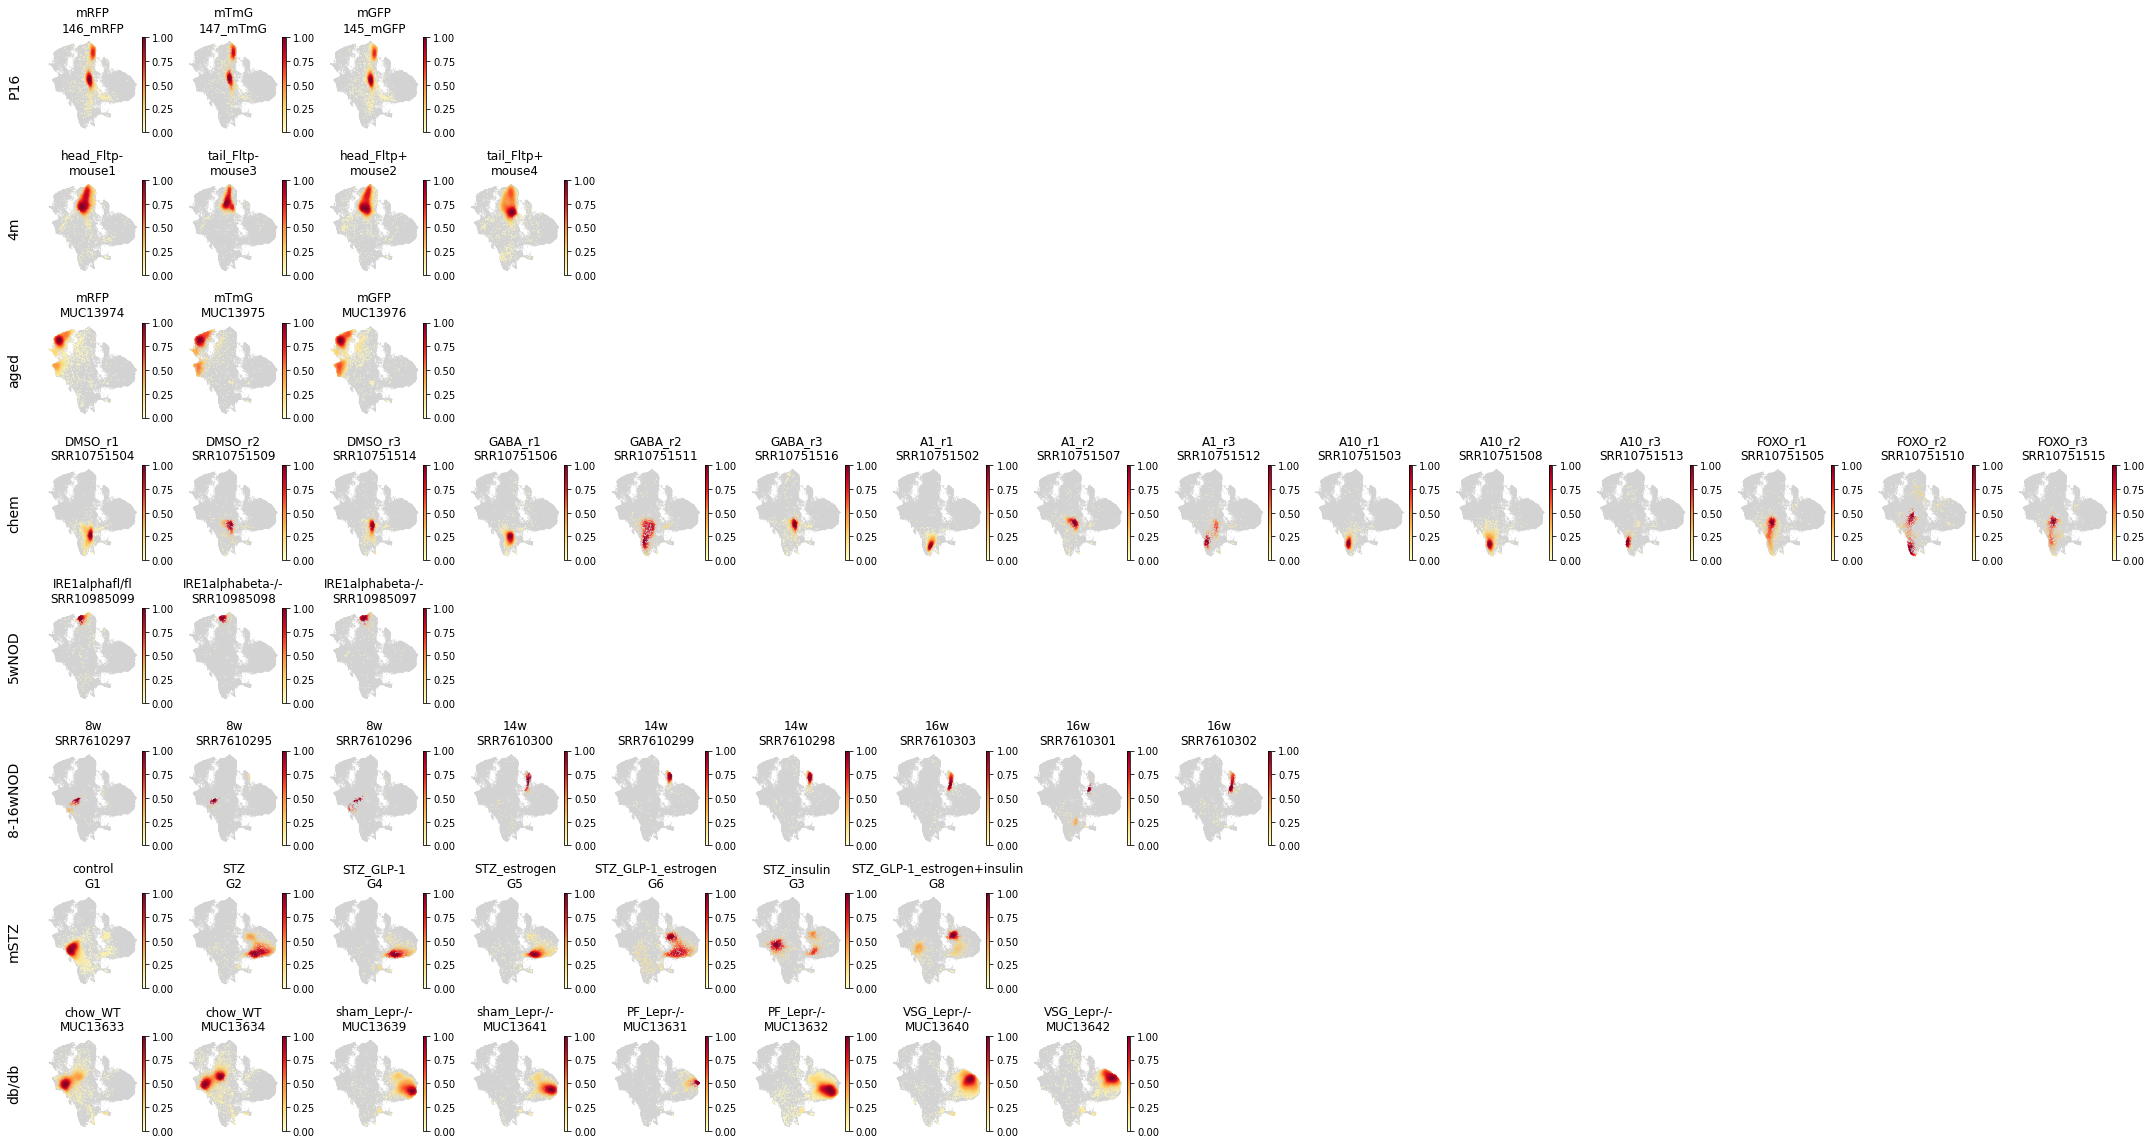

In [11]:
# Prepare figure grid
# N studies to plot - exclude studies that have too little cells in all samples
min_cells=20
studies_plot=(adata_rn_b.obs.groupby(['study_parsed','study_sample']).size()>=min_cells)
studies_plot=studies_plot[studies_plot]
studies_plot=set([i[0] for i in studies_plot.index.values])
# Sort order
studies_plot=[s for s in adata_rn_b.uns['study_parsed_order'] if s in studies_plot]
fig_rows=len(studies_plot)
fig_cols=max(
    [adata_rn_b.obs.query('study_parsed ==@study').file.unique().shape[0] 
     for study in studies_plot])
fig,axs=plt.subplots(fig_rows,fig_cols,figsize=(2*fig_cols,2*fig_rows))
# Plotting order of designs 
design_order=['mRFP','mTmG','mGFP',
          'head_Fltp-','tail_Fltp-', 'head_Fltp+', 'tail_Fltp+',
          'IRE1alphafl/fl','IRE1alphabeta-/-', 
          '8w','14w', '16w',
          'DMSO_r1','DMSO_r2', 'DMSO_r3','GABA_r1','GABA_r2', 'GABA_r3',
               'A1_r1','A1_r2','A1_r3','A10_r1','A10_r2', 'A10_r3',  'FOXO_r1', 'FOXO_r2', 'FOXO_r3', 
          'E12.5','E13.5','E14.5', 'E15.5', 
          'chow_WT','sham_Lepr-/-','PF_Lepr-/-','VSG_Lepr-/-',   
          'control','STZ', 'STZ_GLP-1','STZ_estrogen', 'STZ_GLP-1_estrogen',
              'STZ_insulin','STZ_GLP-1_estrogen+insulin' 
        ]
# Make study sample design with multiple rows to fit better
adata_rn_b.obs['design_sample_newline']=[
    '\n'.join(i) for i in zip(adata_rn_b.obs['design'],adata_rn_b.obs['file'])]
# Calculagte density
for row_idx,study in enumerate(studies_plot):
    designs=adata_rn_b.obs.query('study_parsed ==@study')[['study_sample_design','design']].drop_duplicates()
    designs.design=pd.Categorical(designs.design, 
                  categories=[design for design in design_order if design in list(designs.design.values)],
                  ordered=True)
    col_idx=0
    for sample in designs.sort_values('design')['study_sample_design'].values:
        subset=adata_rn_b.obs.study_sample_design==sample
        adata_sub=adata_rn_b[subset,:].copy()
        ax=axs[row_idx,col_idx]
        if adata_sub.shape[0]>=min_cells:
            sc.tl.embedding_density(adata_sub,basis='umap_opt')
            sc.pl.embedding(adata_rn_b,'X_umap_opt',ax=ax,s=3,show=False,frameon=False)
            sample_title=adata_sub.obs.design_sample_newline.unique()[0]
            sc.pl.embedding_density(adata_sub,basis='umap_opt',key='umap_opt_density',
                                    ax=ax,title=sample_title,
                                    show=False,frameon=False,
                                   fg_dotsize=3,bg_dotsize=2) 
            axs[row_idx,col_idx].set_xlabel('')
            # Add axes for study row label
            if col_idx==0:
                ax.axis('on')
                ax.tick_params(
                    top='off', bottom='off', left='off', right='off', 
                    labelleft='on', labelbottom='off')
                ax.set_ylabel(study+'\n', rotation=90, fontsize=14)
                ax.set(frame_on=False)
            col_idx+=1
    # Remove unused axes
    while col_idx<fig_cols:
        axs[row_idx,col_idx].remove()
        col_idx+=1
del adata_sub
fig.tight_layout()
plt.savefig(path_fig+'umap_beta_density_sample_eopt.png',dpi=300,bbox_inches='tight')

#### Sex
Sex in samples with mixed sex, shown per dataset


In [6]:
# Studies with mixed samples
studies=['Fltp_P16','Fltp_2y']

Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


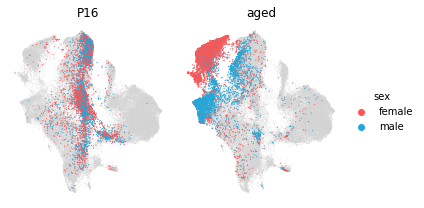

In [7]:
# UMAP with sex per study
fig,axs=plt.subplots(1,len(studies),figsize=(3*len(studies),3))
for i_ax,study in enumerate(studies):
    ax=axs[i_ax]
    # Plot all cells as background
    sc.pl.embedding(adata_rn_b,'X_umap_opt',ax=ax,show=False)
    
    # Plot study cells colored by sex
    
    # Study subset
    adata_temp=adata_rn_b[adata_rn_b.obs.study==study,:].copy()
    
    # Random cell ordering so that cells on top are not biased by group size
    # Cells on top have are taken one per group as long as groups have cells
    # and then append the rest of the group cells at the end (plotted on the bottom)
    groups=adata_temp.obs.reset_index().groupby('sex',dropna=True)
    n_group_max=groups.size().max()
    n_groups=len(groups)
    cells=np.empty((n_group_max*n_groups))
    cells[:]=np.nan
    for idx,(group,data) in enumerate(groups.groups.items()):
        # Put n-th group's cells to n-th positions, intertwining the groups
        idx=np.array(range(data.shape[0]))*n_groups+idx
        # random ordering within group
        np.random.seed(0)
        idx=np.random.permutation(idx)
        cells[idx]=data   
    # Remove empty cell positions, convert to int for indexing, 
    # reverse order to plot mixed part on top
    cells=cells[~np.isnan(cells)].astype(int)[::-1]
    
    # plot sex per study
    sc.pl.embedding(adata_temp[cells,:],'X_umap_opt',color='sex',s=5,ax=ax,
                    title=adata_temp.obs['study_parsed'][0],
                    show=False,
                    palette={'male':'#22A9DA','female':'#FF5757'},frameon=False)
    
    # Add legend to the last plot
    if i_ax!=(len(studies)-1):
        ax.get_legend().remove()
    else:
        ax.get_legend().set_title('sex')

fig.tight_layout()
plt.savefig(path_fig+'umap_beta_Fltp_covariate_sex_eopt.png',dpi=300,bbox_inches='tight')
del adata_temp